<a href="https://colab.research.google.com/github/jhkang0516/Mogakso/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 라이브러리 불러오기

In [10]:
import os

# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Visualization
import seaborn as sns
import missingno as msno

import warnings

# seaborn의 font scale을 사용하여 graph의 font size를 지정합니다.
plt.style.use('seaborn')
sns.set(font_scale=2.5)

# ignore warnings
warnings.filterwarnings('ignore')

# 브라우저의 내부에 plot을 그릴 수 있도록 설정합니다.
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

# 2. 데이터

In [14]:
from google.colab import drive
drive.mount('/content/drive')
# 데이터를 우선 가져와야합니다.
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# 데이터 미리보기
train.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train.info()
print('-'*20)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    

## 결측값 확인하기
아래 보면, 흰색으로 표시된 값들이 결측값이다.     
나이는 당연히 중간 중간 빈 값들 존재 가능

<Axes: >

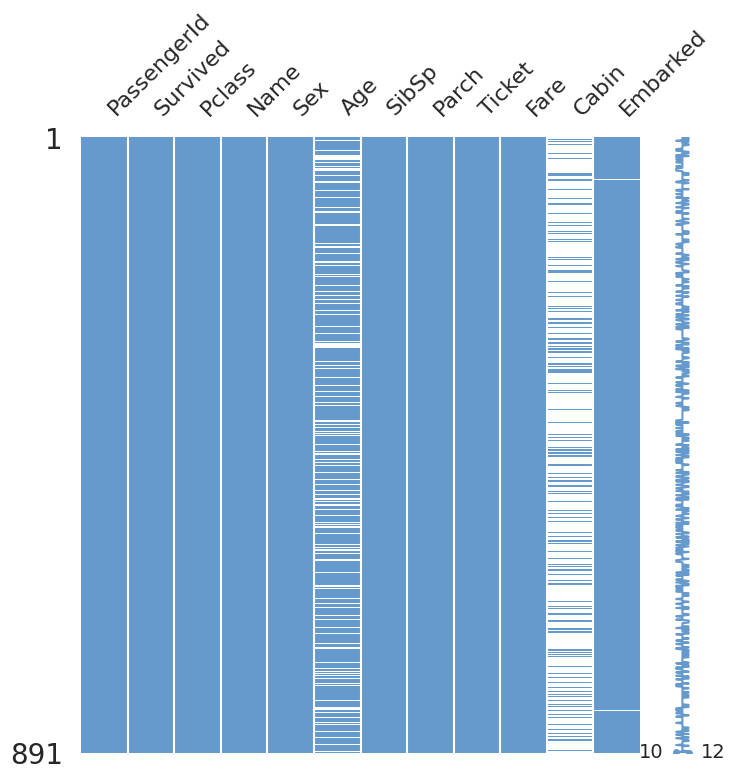

In [16]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.4, 0.6, 0.8))

<Axes: >

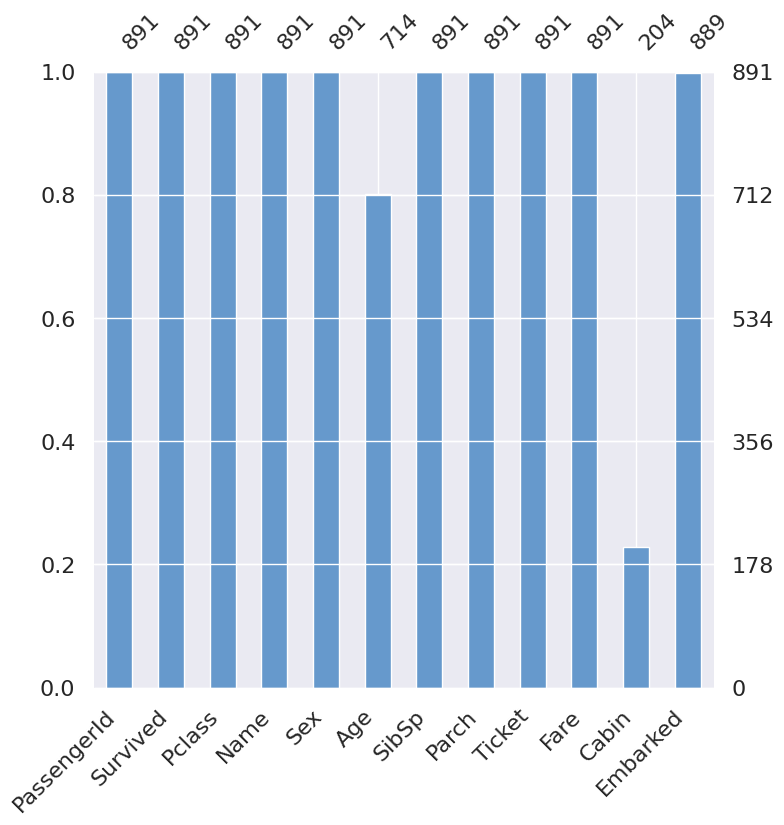

In [17]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.4, 0.6, 0.8))

null값 존재 X

In [ ]:
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name','Ticket'], axis=1)

3가지 요소는 확실히 생존자 예측에 전혀 관계 없으므로 삭제 ,   
axis = 1은 열을 기준으로 삭제해준다.

출처 : https://hong-yp-ml-records.tistory.com/14